# O Dataset e o Projeto: Passangers 
<hr>
<p> Thomas Bekhor, João Bresser, Marcos Paulo</p>

###  Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> O dataset é o conjunto de passageiros, que fizeram uma viagem interplanetar.</p>

### Features do Dataset:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Passengerid </b> - Numero individual de cada passageiro.</li>
    <li><b>Home Planet</b> - Local de origem do passageiro. </li>
    <li><b>CryoSleep</b> - Indica se o passageiro foi colocado em "CryoSleep"  </li>
    <li><b>Cabin</b> - Cabine que o passageiro estava. Deck/numero/lado </li>
    <li><b>Destination</b> - Local que o passageiro vai </li>
    <li><b>Age</b> - Idade do passageiro </li>
    <li><b>VIP</b> - Se o passageiro é VIP </li>
    <li><b>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</b> - Dinheiro que cada passageiro gastou na viagem </li>
    <li><b>Name</b> - Nome do passageiro </li>
    <li><b>Transported</b> - Se o passageiro foi transportado para outra dimensão </li>
</ul>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Classificação</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset. No final do projeto teremos um modelo de Classificação acurado para a target Transported.</p>
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
    

# <font color='red' style='font-size: 30px;'>Importando bibliotecas</font>
<hr style='border: 2px solid red;'>

In [1]:
%matplotlib inline
#bibliotecas matemáticas e graficas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#separação entre treino e teste
from sklearn.model_selection import train_test_split

#separação estratificada
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#resultados da modelagem
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

#fazer o cross validation
from sklearn.model_selection import cross_val_score


#encontrando os melhores features
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest

#serializar modelo
import joblib


#tuning de hiperparametros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from pprint import pprint

#from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

In [2]:
RAND_SEED = 42
np.random.seed(RAND_SEED)

# <font color='red' style='font-size: 30px;'>Explorando o DataSet</font>
<hr style='border: 2px solid red;'>

Lendo a base de dados

In [3]:
df_passangers = pd.read_csv("DATA2_passengers.csv")

Entendendo como é o DataFrame

In [4]:
df_passangers.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_passangers['Valor Bruto']=df_passangers['RoomService']+df_passangers['FoodCourt']+df_passangers['ShoppingMall']+df_passangers['Spa']+df_passangers['VRDeck']
df_passangers

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Valor Bruto
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0


In [6]:
df_passangers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0
Valor Bruto,7785.0,1484.601541,2845.288241,0.0,0.0,736.0,1486.0,35987.0


Vendo as informações do nosso DataFrame

In [7]:
df_passangers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Valor Bruto   7785 non-null   float64
dtypes: bool(1), float64(7), object(7)
memory usage: 959.4+ KB


In [8]:
df_passangers=df_passangers[df_passangers["Transported"].notna()]
#ver a quantidade de nao nulos e fazer input para os que tem quantidade relevante 
df_passangers=df_passangers[df_passangers["Destination"].notna()]
df_passangers=df_passangers[df_passangers["Spa"].notna()]
df_passangers=df_passangers[df_passangers["HomePlanet"].notna()]
df_passangers=df_passangers[df_passangers["CryoSleep"].notna()]
df_passangers=df_passangers[df_passangers["Valor Bruto"].notna()]
df_passangers=df_passangers[df_passangers["ShoppingMall"].notna()]
df_passangers=df_passangers[df_passangers["Cabin"].notna()]
df_passangers=df_passangers[df_passangers["Age"].notna()]
df_passangers=df_passangers[df_passangers["VIP"].notna()]
df_passangers=df_passangers[df_passangers["RoomService"].notna()]
df_passangers=df_passangers[df_passangers["FoodCourt"].notna()]
df_passangers=df_passangers[df_passangers["VRDeck"].notna()]
#retirei colunas nome e id pq é individual de cada e não ajuda na classificação

df_passangers.loc[:,["HomePlanet","CryoSleep","Cabin","Destination","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]]
df=df_passangers
print(df.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  Valor Bruto  
0        False          0.0  
1         True        736.0  
2        False

In [9]:
df["Primeira Cabin"],df["Segunda Cabin"],df["Terceira Cabin"]=df["Cabin"].str.split('/').str
del df["Cabin"]
del df['Name']
del df['PassengerId']

C:\Users\joaob\AppData\Local\Temp/ipykernel_28232/4114384792.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df["Primeira Cabin"],df["Segunda Cabin"],df["Terceira Cabin"]=df["Cabin"].str.split('/').str


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6764 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      6764 non-null   object 
 1   CryoSleep       6764 non-null   object 
 2   Destination     6764 non-null   object 
 3   Age             6764 non-null   float64
 4   VIP             6764 non-null   object 
 5   RoomService     6764 non-null   float64
 6   FoodCourt       6764 non-null   float64
 7   ShoppingMall    6764 non-null   float64
 8   Spa             6764 non-null   float64
 9   VRDeck          6764 non-null   float64
 10  Transported     6764 non-null   bool   
 11  Valor Bruto     6764 non-null   float64
 12  Primeira Cabin  6764 non-null   object 
 13  Segunda Cabin   6764 non-null   object 
 14  Terceira Cabin  6764 non-null   object 
dtypes: bool(1), float64(7), object(7)
memory usage: 799.3+ KB


In [11]:
df["HomePlanet"]=df["HomePlanet"].astype('category')
df["HomePlanet"].cat.categories=[0,1,2]
# 0 é Earth , Europa é 1 e Mars é 2

df["Destination"]=df["Destination"].astype('category')
print(df["Destination"].cat.categories)
df["Destination"].cat.categories=[0,1,2]
# 0 é 55 Canccri e 1 é  PSO J318.5-22, 2 é TRAPPIST-1e

df["Primeira Cabin"]=df["Primeira Cabin"].astype('category')
df["Primeira Cabin"].cat.categories=[0,1,2,3,4,5,6,7]
#0 é A, 1 é B ....6 é F e 7 é T
df["Segunda Cabin"]=df["Segunda Cabin"].astype('category')
#analisando posso deletar pq tem pouquissimos numeros para cada variavel
del df["Segunda Cabin"]
df["Terceira Cabin"]=df["Terceira Cabin"].astype("category")
df["Terceira Cabin"].cat.categories=[0,1]
#P=0 e S=1

Index(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype='object')


# <font color='red' style='font-size: 30px;'>Explorando o target</font>
<hr style='border: 2px solid red;'

In [12]:
df.groupby(by='HomePlanet')["Transported"].value_counts(normalize=True)

HomePlanet  Transported
0           False          0.574672
            True           0.425328
1           True           0.658095
            False          0.341905
2           True           0.515390
            False          0.484610
Name: Transported, dtype: float64

In [13]:
df.groupby(by='Primeira Cabin')["Transported"].value_counts(normalize=True)

Primeira Cabin  Transported
0               False          0.516432
                True           0.483568
1               True           0.730109
                False          0.269891
2               True           0.677796
                False          0.322204
3               False          0.574803
                True           0.425197
4               False          0.645714
                True           0.354286
5               False          0.565670
                True           0.434330
6               True           0.522041
                False          0.477959
7               False          0.666667
                True           0.333333
Name: Transported, dtype: float64

In [14]:
df.groupby(by='Terceira Cabin')["Transported"].value_counts(normalize=True)

Terceira Cabin  Transported
0               False          0.551063
                True           0.448937
1               True           0.555328
                False          0.444672
Name: Transported, dtype: float64

In [15]:
df.groupby(by='CryoSleep')["Transported"].value_counts(normalize=True)

CryoSleep  Transported
False      False          0.667199
           True           0.332801
True       True           0.815966
           False          0.184034
Name: Transported, dtype: float64

In [16]:
df.groupby(by='Destination')["Transported"].value_counts(normalize=True)

Destination  Transported
0            True           0.617892
             False          0.382108
1            True           0.504687
             False          0.495312
2            False          0.532892
             True           0.467108
Name: Transported, dtype: float64

In [17]:

df['Faixa_idade']=pd.cut(df['Age'],np.arange(0,85,5))
oi=df['Faixa_idade'].value_counts(normalize=True)
pd.crosstab(df['Transported'],df['Faixa_idade'])

Faixa_idade,"(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]"
Transported,,,,,,,,,,,,,,,,
False,71,66,181,465,639,487,390,337,239,163,129,80,55,18,14,5
True,185,109,239,458,525,472,325,287,227,166,111,91,55,22,7,3


In [18]:
df.groupby(by='VIP')["Transported"].value_counts(normalize=True)

VIP    Transported
False  True           0.505909
       False          0.494091
True   False          0.621951
       True           0.378049
Name: Transported, dtype: float64

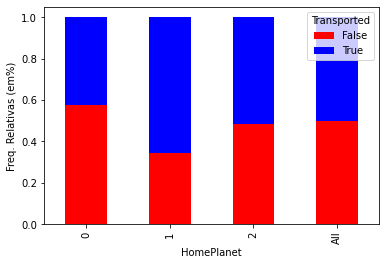

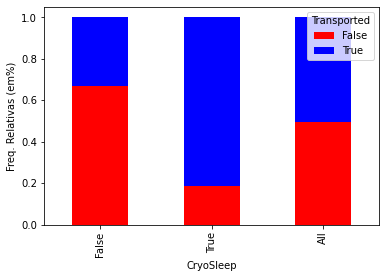

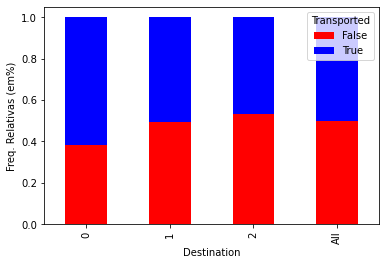

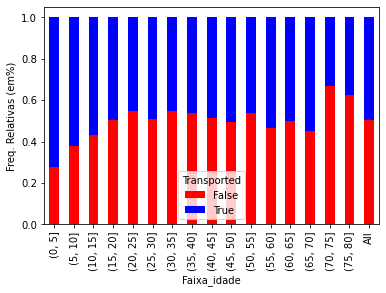

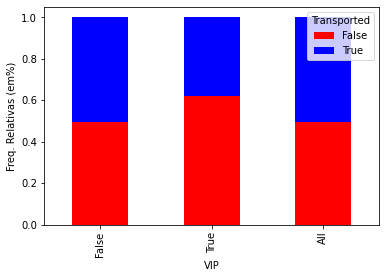

In [19]:
lista=["HomePlanet",'CryoSleep','Destination','Faixa_idade','VIP']
cores = ['red','blue','green','darkgreen','yellow','purple','pink','orange']
n=0
#seria bom fazer uma figura
for i in lista:
    Transported_x_y=pd.crosstab(df[i], df['Transported'], normalize='index',margins=True).round(4)
    Transported_x_y.plot.bar(color=cores, stacked=True)
    plt.ylabel("Freq. Relativas (em%)")
    plt.xlabel(i)
plt.show()

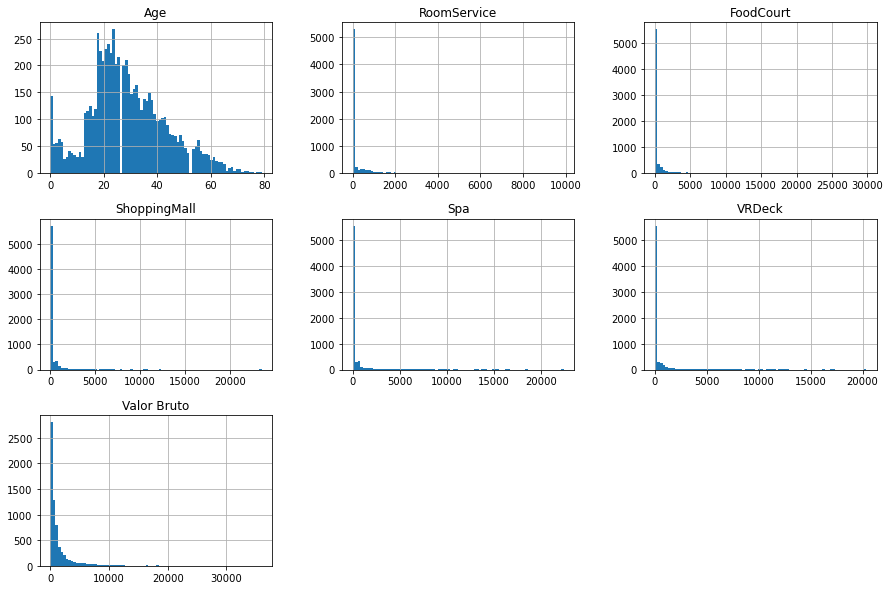

In [20]:
BINS= int(np.sqrt(len(df.index)))
df.hist(bins=BINS,figsize=(15,10));

In [21]:
del df["Faixa_idade"]

# <font color='red' style='font-size: 30px;'>Treino e Teste</font>
<hr style='border: 2px solid red;'>

In [22]:
ypassanger=df.loc[:,["Transported"]]
Xpassanger=df.drop(["Transported"],axis=1)

In [23]:
X_trainpassanger, X_testpassanger, y_trainpassanger, y_testpassanger = train_test_split(
    Xpassanger,
    ypassanger,                  
    test_size=0.3,
    random_state=RAND_SEED,
)
X_testpassanger.head()


#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X_trainpassanger,y_trainpassanger)
#y= X_testpassanger

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Valor Bruto,Primeira Cabin,Terceira Cabin
7726,0,False,2,27.0,False,1007.0,0.0,0.0,9.0,0.0,1016.0,6,0
6296,1,True,0,17.0,False,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3841,0,False,2,25.0,False,0.0,38.0,0.0,847.0,112.0,997.0,4,0
3003,0,False,2,21.0,False,0.0,0.0,687.0,46.0,20.0,753.0,6,0
636,1,False,2,36.0,False,0.0,0.0,0.0,4507.0,5689.0,10196.0,4,1


In [24]:
y_testpassanger.head()

,Transported
7726,False
6296,True
3841,False
3003,False
636,False


# <font color='red' style='font-size: 30px;'>Modelos de Classificação</font>
<hr style='border: 2px solid red;'>

In [25]:

dtc=DecisionTreeClassifier()
y_trainpassanger=y_trainpassanger.astype('int')
dtc.fit(X_trainpassanger, y_trainpassanger)
resultado_dtc=dtc.predict(X_testpassanger)

In [26]:
# Criando modelo e treinando com os dados de treino
clr = LogisticRegression()
clr.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_clr = clr.predict(X_testpassanger)

C:\Users\joaob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\joaob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\joaob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed

In [27]:
# Criando modelo e treinando com os dados de treino
knn = KNeighborsClassifier()
knn.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_knn = knn.predict(X_testpassanger)

C:\Users\joaob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\joaob\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\joaob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [28]:
nb = GaussianNB()
knn.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_nb = nb.predict(X_testpassanger)

C:\Users\joaob\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\joaob\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
SVM = SVC()
SVM.fit(X_trainpassanger, y_trainpassanger)
# Fazendo a predição nos dados de treino
resultado_SVM = SVM.predict(X_testpassanger)

# <font color='red' style='font-size: 30px;'>Desempenho dos modelos</font>
<hr style='border: 2px solid red;'>

## Resultado Decision Tree

In [ ]:

print(classification_report(y_testpassanger, resultado_dtc))

In [ ]:
def display_scores(scores):
    print('Scores:', scores.round(decimals=2))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [ ]:
tree_scores = cross_val_score(
    dtc,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
)

tree_rmse_scores = tree_scores
print(tree_rmse_scores)

display_scores(tree_rmse_scores)

## Resultado KNN

In [ ]:
print(classification_report(y_testpassanger, resultado_knn))

In [ ]:
knn_scores = cross_val_score(
    knn,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
)

knn_rmse_scores = knn_scores
print(knn_rmse_scores)

display_scores(knn_rmse_scores)

## Resultados Regressão Logística 
(é de classificação)

In [ ]:
print(classification_report(y_testpassanger, resultado_clr))

In [ ]:
clr_scores = cross_val_score(
    clr,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
)

clr_rmse_scores = clr_scores
print(clr_rmse_scores)

display_scores(clr_rmse_scores)

# Resultados Gaussian Classifier

In [ ]:
print(classification_report(y_testpassanger, resultado_nb))

In [ ]:
nb_scores = cross_val_score(
    nb,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
)

nb_rmse_scores = nb_scores
print(nb_rmse_scores)

display_scores(nb_rmse_scores)

# Resultados SVC 

In [ ]:
print(classification_report(y_testpassanger, resultado_SVM))

In [ ]:
SVM_scores = cross_val_score(
    SVM,
    X_trainpassanger,
    y_trainpassanger,
    cv=10,
)

SVM_rmse_scores = SVM_scores
print(SVM_rmse_scores)

display_scores(SVM_rmse_scores)

# boxplot

In [ ]:
df_passangers.boxplot(['Valor Bruto'], by=['Transported'])
#fazer modelo com e sem para ver se muda alguma coisa
#fazer o predict para o perfil de uma pessoa e de outra pessoa que so muda a variavel do valor bruto
plt.ylim(-2000,5000)

In [ ]:
df_passangers.boxplot(['Age'], by=['Transported'])